In [2]:
import numpy as np

#low_isc = np.load('S4B2/Generated_Data/low_isc_averaged_with_cov.npz')['low_isc_averaged']
#high_isc['high_isc_averaged'] low_isc
high_isc = np.load('/homes/v20subra/S4B2/Generated_Data/high_isc_averaged_with_cov.npz')['high_isc_averaged']
plot_high = dict() 
for m in range(360):
    hm = np.triu(np.corrcoef(np.array(high_isc)[:,m,:])) #high_isc['high_isc_averaged']
    
    iscs = list()
    for i in range(9):
    
         iscs.append(np.sum(hm[i][i+1:])/len((hm[i][i+1:])))
    plot_high[m] = iscs
    #plot_high.append(sum(iscs)/ sum(np.arange(10)))

In [3]:

low_isc = np.load('/homes/v20subra/S4B2/Generated_Data/low_isc_averaged_with_cov.npz')['low_isc_averaged']
plot_low = dict()
for m in range(360):
    hm = np.triu(np.corrcoef(np.array(low_isc)[:,m,:])) #corrcoef and take only the upper half of the matrix

    iscs = list() #to store row-wise results
    for i in range(9): # Loop through each of the 9 rows
        iscs.append(np.sum(hm[i][i+1:])/len((hm[i][i+1:]))) #
    plot_low[m] = iscs # store ROI-wise
    
    
#plot_low.keys() = ROIs & plot_low.values() = 9 correlations per ROI

In [16]:
from scipy import stats
ttest = list()
tvalues = list()

for i in range(360):
    ttest.append(stats.ttest_rel(plot_high[i],plot_low[i])[1])
    tvalues.append(stats.ttest_rel(plot_high[i],plot_low[i])[0])

In [20]:
#np.savez_compressed('ttest_on_correlation',pvalues = ttest,tvalues =tvalues)
sum(np.array(ttest) < 0.05)

6

In [139]:
zeroed_for_rois = np.zeros(shape=(1,360))
zeroed_for_rois [:,np.where(np.array(ttest) <= 0.05)] = np.array(tvalues)[np.where(np.array(ttest) <= 0.05)]


zeroed_for_rois_pvalue = np.zeros(shape=(1,360))
zeroed_for_rois_pvalue [:,np.where(np.array(ttest) <= 0.05)] = 1


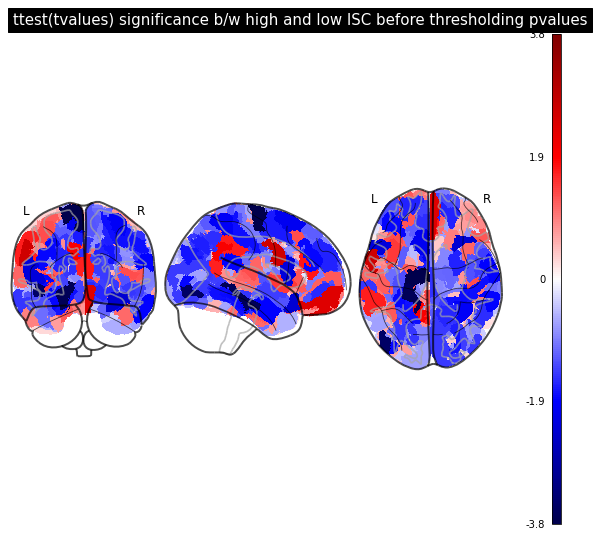

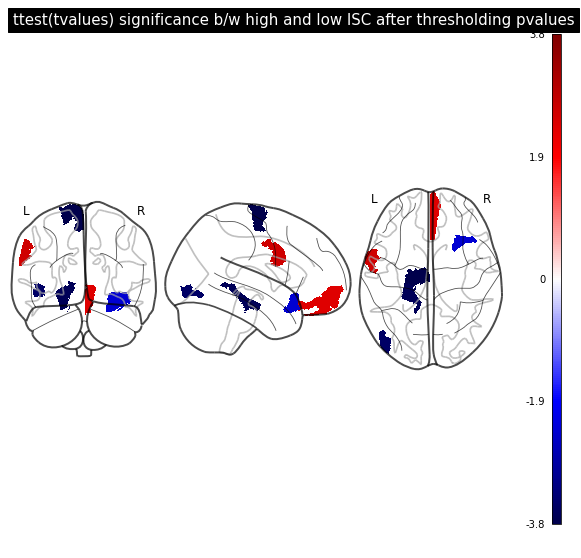

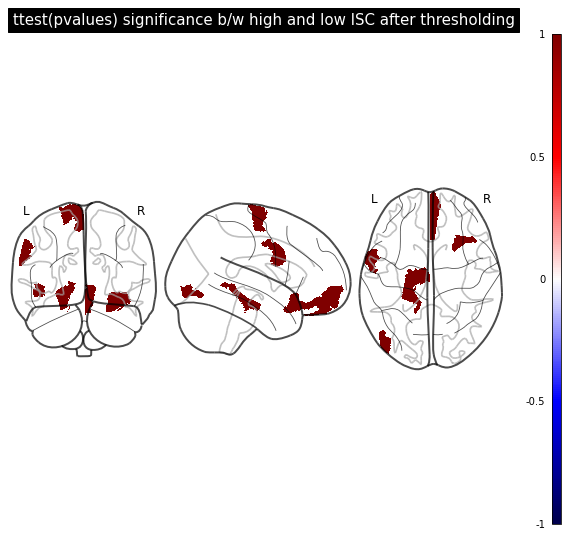

In [140]:
#np.savez('low_isc_averaged',low_isc = low_isc)
import matplotlib.pyplot as plt

from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj
import matplotlib.pyplot as plt

path_Glasser = 'S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)


#print(NiftiMasker.__doc__)
def brain_plot(data, title, expand):
    fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))

    signal=[]
    U0_brain=[]
    if expand:
        signal=np.expand_dims(data, axis=0) # add dimension 1 to signal array
    else:
        signal=data # add dimension 1 to signal array
    U0_brain = signals_to_img_labels(signal,path_Glasser,mnitemp['mask'])
    plotting.plot_glass_brain(U0_brain,title=title,colorbar=True,plot_abs=False,cmap='seismic',display_mode='ortho',symmetric_cbar=True,figure=fig,axes=ax,vmin=min(plot))
    

brain_plot(tvalues,'ttest(tvalues) significance b/w high and low ISC before thresholding pvalues', expand =True)
brain_plot(zeroed_for_rois,'ttest(tvalues) significance b/w high and low ISC after thresholding pvalues',expand =False)
brain_plot(zeroed_for_rois_pvalue,'ttest(pvalues) significance b/w high and low ISC after thresholding',expand =False)


In [110]:
U0_brain.to_filename('ttest_significance_correlation_unthresholded_tvalues.nii.gz')

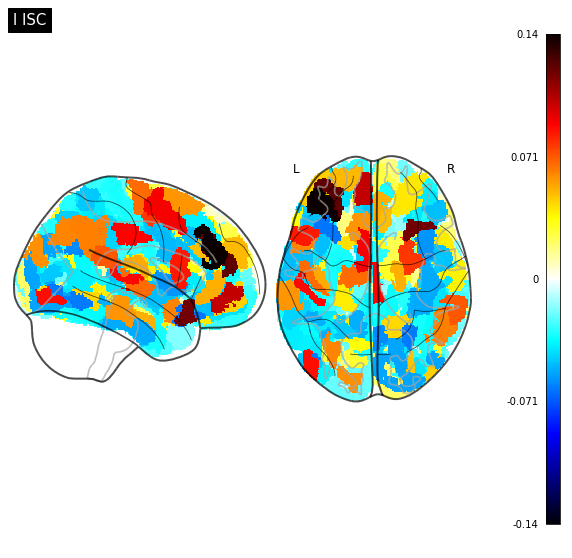

In [24]:
#np.savez('low_isc_averaged',low_isc = low_isc)
import matplotlib.pyplot as plt

from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj
import matplotlib.pyplot as plt

path_Glasser = 'S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)



fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))

signal=[]
U0_brain=[]
signal=np.expand_dims(np.array(plot), axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,path_Glasser,mnitemp['mask'])
plotting.plot_glass_brain(U0_brain,title='l ISC',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz',figure=fig,axes=ax)



In [152]:
import seaborn as sns

In [175]:
def probe(vertices,data):

    plot = list()
    for m in tqdm.tqdm(range(vertices)):
        hm = np.triu(np.corrcoef(np.array(data)[:,m,:]))
        iscs = list()
        comp = [iscs.append(np.sum(hm[i][i+1:])) for i in range(9)]
        plot.append(sum(iscs)/ 45)
    return plot


### 20k vertices

In [111]:
low_isc_20k = np.load('S4B2/Generated_Data/low_isc_wo_average.npz')['low_isc_wo_average']
high_isc_20k = np.load('S4B2/Generated_Data/high_isc_wo_average.npz')['high_isc_wo_average']


In [176]:
l = probe(20484,low_isc_20k)

100%|██████████| 20484/20484 [1:53:59<00:00,  2.99it/s]


In [177]:
h = probe(20484,high_isc_20k)

100%|██████████| 20484/20484 [1:50:13<00:00,  3.10it/s]


In [160]:
q = [ 23, 102, 103, 106, 123, 172, 173, 174, 203, 282, 286, 303, 352,
        353, 354]

In [180]:
#np.savez('S4B2/Generated_Data/high_isc_20k_correlation.npz',high_isc_20k_correlation = h)

In [7]:
from data import surface_plot
from imp import reload 
import numpy as np
reload(surface_plot)
h = np.load('S4B2/Generated_Data/high_isc_20k_correlation.npz')['high_isc_20k_correlation']


surface_plot.plot(np.array(h),'high ISC',None,None,None)

FileNotFoundError: No such file or no access: '/brainnotation/tpl-fsaverage_den-10k_hemi-L_pial.surf.gii'

FileNotFoundError: No such file or no access: '/brainnotation/tpl-fsaverage_den-10k_hemi-R_pial.surf.gii'

ValueError: zero-size array to reduction operation fmin which has no identity

In [5]:
cd

/homes/v20subra
